In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [3]:
train=pd.read_csv("train_NIR5Yl1.csv")
test=pd.read_csv("test_8i3B3FC.csv")

In [4]:
print(train.shape)
print(test.shape)

(330045, 7)
(141448, 6)


In [5]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [6]:
print("train coloumns:",train.columns)
print("test coloumns:",test.columns)

train coloumns: Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')
test coloumns: Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')


In [10]:
train.drop(["ID","Username"],axis=1,inplace=True)

In [11]:
test.drop(["ID","Username"],axis=1,inplace=True)

In [12]:
train.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       0
dtype: int64

In [13]:
test.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
dtype: int64

In [15]:
train.describe()

,Reputation,Answers,Views,Upvotes
count,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,5.231058e+06,615278.000000


In [17]:
df=train.groupby('Tag').mean()

In [18]:
df

,Reputation,Answers,Views,Upvotes
Tag,,,,
a,6065.168102,4.259189,31800.916327,316.460136
c,10566.420657,4.047697,26746.676875,327.569916
h,6985.072116,3.778837,33948.958812,384.719704
i,5238.884290,3.679753,15806.680093,117.386636
j,8285.527730,4.347256,43291.211236,540.364686
o,5656.755603,3.380654,13504.645538,112.157294
p,8062.053033,3.977077,33184.984334,407.351971
r,5290.282109,2.304292,12033.055940,79.027246
s,6545.661622,3.600866,25807.082965,237.031385


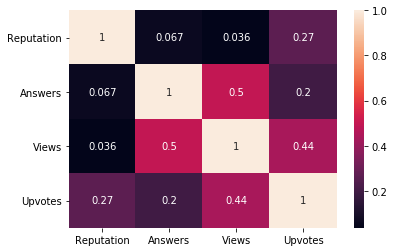

In [22]:
plt.figure(figsize=(6,4))
corrl=train.corr()
sns.heatmap(corrl,annot=True)

Text(0, 0.5, 'Views')

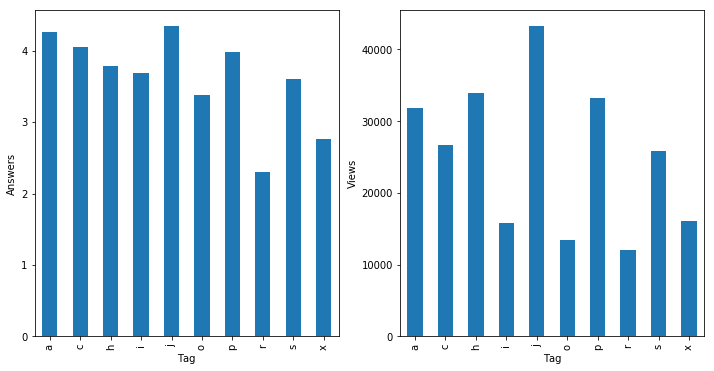

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['Answers'].plot(kind='bar')
plt.ylabel("Answers")
plt.subplot(1,2,2)
df['Views'].plot(kind='bar')
plt.ylabel('Views')

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["Tag"]=le.fit_transform(train["Tag"])
test["Tag"]=le.fit_transform(test["Tag"])

In [31]:
test.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [34]:
x=train.drop(['Upvotes'],axis=1)


In [35]:
y=train["Upvotes"]

In [38]:
sc=StandardScaler()
sc.fit_transform(x)
sc.fit_transform(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.42412492, -0.0815434 , -0.25573354,  0.04174163],
       [-1.02325005,  0.59439988,  0.58285319, -0.33750519],
       [-0.22150031, -0.25058296, -0.81479136, -0.10802788],
       ...,
       [ 0.9811243 , -0.26821065,  0.30332428,  0.3385673 ],
       [ 0.58024943, -0.27749027, -0.25573354, -0.24461648],
       [-1.42412492, -0.26057915, -0.53526245, -0.21235498]])

In [58]:


# polynomial_features= PolynomialFeatures(degree=2)
# x_poly = polynomial_features.fit_transform(x)

# model = LinearRegression()
# model.fit(x_poly, y)
# y_poly_pred = model.predict(x_poly)

# rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
# r2 = r2_score(y,y_poly_pred)
# print(rmse)
# print(r2)

1104.0770688674816
0.9055459086614439


In [61]:
# from sklearn.linear_model import LassoLars

In [62]:
# ls=LassoLars()

In [63]:
# ls.fit(x_poly,y)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [65]:
# y_lpred=ls.predict(test)

ValueError: shapes (141448,4) and (15,) not aligned: 4 (dim 1) != 15 (dim 0)